# Bussiness understanding

#### بانک ها دستخوش تغییرات شگرف و پیچیده ای هستند

#### حفظ مشتری و افزایش درآمد حاصل از مشتریان فعلی ، استراتژی بسیار سودآورتری برای رشد در مقایسه با جذب مشتری جدید است. برای به حداکثر رساندن سود، بانک های تجاری باید با افزایش فروش و در عین حال کاهش تعداد چرنرها، پایگاه مشتریان را افزایش دهند

#### دستیابی به یک مشتری جدید بین 5 تا 25 برابر گرانتر از حفظ مشتری موجود است

#### در این پروژه سعی شده است ، مشتریانی را که احتمالاً خدمات کارت اعتباری را ترک می‌کنند (چرنرها) برای یک بانک پیش‌بینی کنیم تا بتوانند به طور فعال به مشتری مراجعه کنند تا خدمات بهتری به آنها ارائه کنند و تصمیمات مشتریان را در جهت مخالف تغییر دهند.

# Data understanding

In [1]:
# CLIENTNUM                 شماره حساب مشتری
# Attrition_Flag            وضعیت حساب مشتری
# Customer_Age              سن مشتری
# Gender                    جنسیت مشتری
# Dependent_count           تعداد افراد تحت تکفل مشتری
# Education_Level           سطح تحصیلات مشتری
# Marital_Status            وضعیت تاهل
# Income_Category           دسته درآمد سالانه مشتری
# Card_Category             نوع کارت مشتری
# Months_on_book            مدت زمان ارتباط مشتری با بانک 
# Months_Inactive_12_mon    تعداد ماه های غیر فعال بودن در 12 ماه اخیر
# Contacts_Count_12_mon     تعداد تماس های بانک با مشتری در 12 ماه اخیر
# Credit_Limit              محدودیت اعتباری در کارت اعتباری
# Total_Revolving_Bal       کل موجودی در گردش کارت اعتباری مشتری
# Avg_Open_To_Buy           متوسط مبلغی که برای خرید باز است
# Total_Amt_Chng_Q4_Q1      (Q4 تا Q1 متغیر بین) میزان تغییر در مبلغ معامله
# Total_Trans_Amt           کل مبلغ معامله
# Total_Trans_Ct            تعداد کل تراکنش ها    
# Total_Ct_Chng_Q4_Q1       تغییر در تعداد تراکنش ها 
# Avg_Utilization_Ratio     متوسط نسبت استفاده از کارت اعتباری

# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import dataset

In [3]:
data=pd.read_csv('BankChurners.csv')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
df=data.drop('CLIENTNUM',axis=1)

# EDA

In [5]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
pd.crosstab(df['Gender'], df['Attrition_Flag'], margins = True, margins_name = "Total")

Attrition_Flag,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


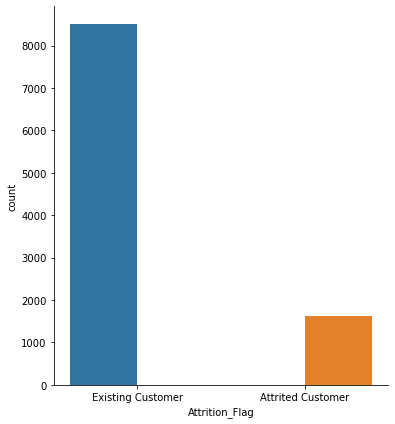

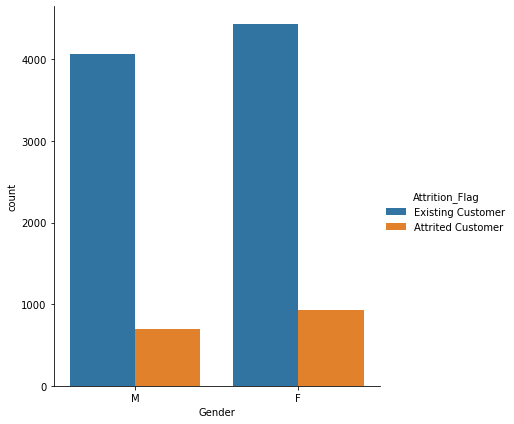

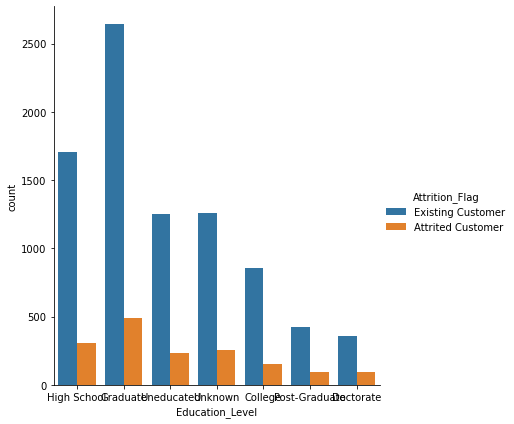

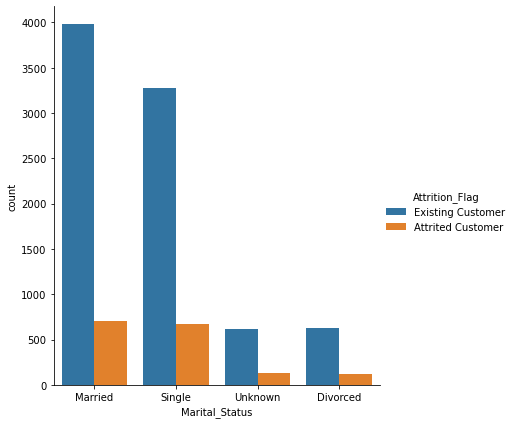

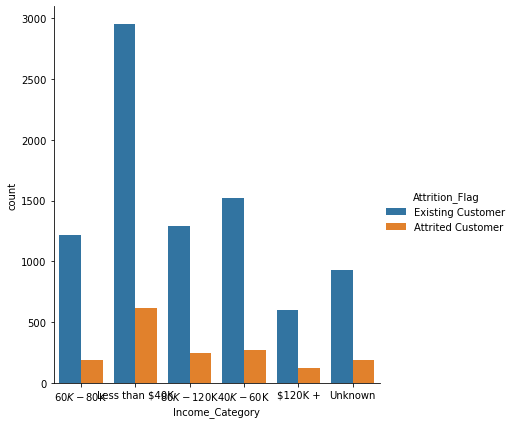

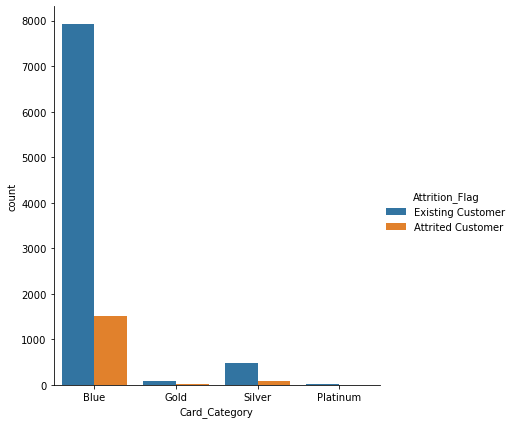

In [8]:
cdata=df.iloc[:,[0,2,4,5,6,7]]  #cdata=categorical data
for i in cdata:
    sns.catplot(x=i, hue="Attrition_Flag",
                data=df, kind="count",
                height=6, aspect=.9)
# dadeha be shedat imbalanc hastan 
# tedade moshtarian khanum kami bishtar aghayun mibashad
# bishtar afradi ke jozve moshtariane gheire rizeshi hastan graduated hastan
#bishtar moshtarian ma kamtar az 40k daramad daran
# bishtare moshtarian ma az blue cart estefade mikonan

C:\Users\sun\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


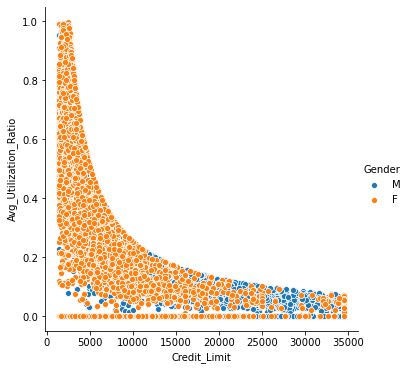

In [9]:
sns.pairplot(x_vars=['Credit_Limit'], y_vars=['Avg_Utilization_Ratio'], data=df, hue="Gender",size=5)

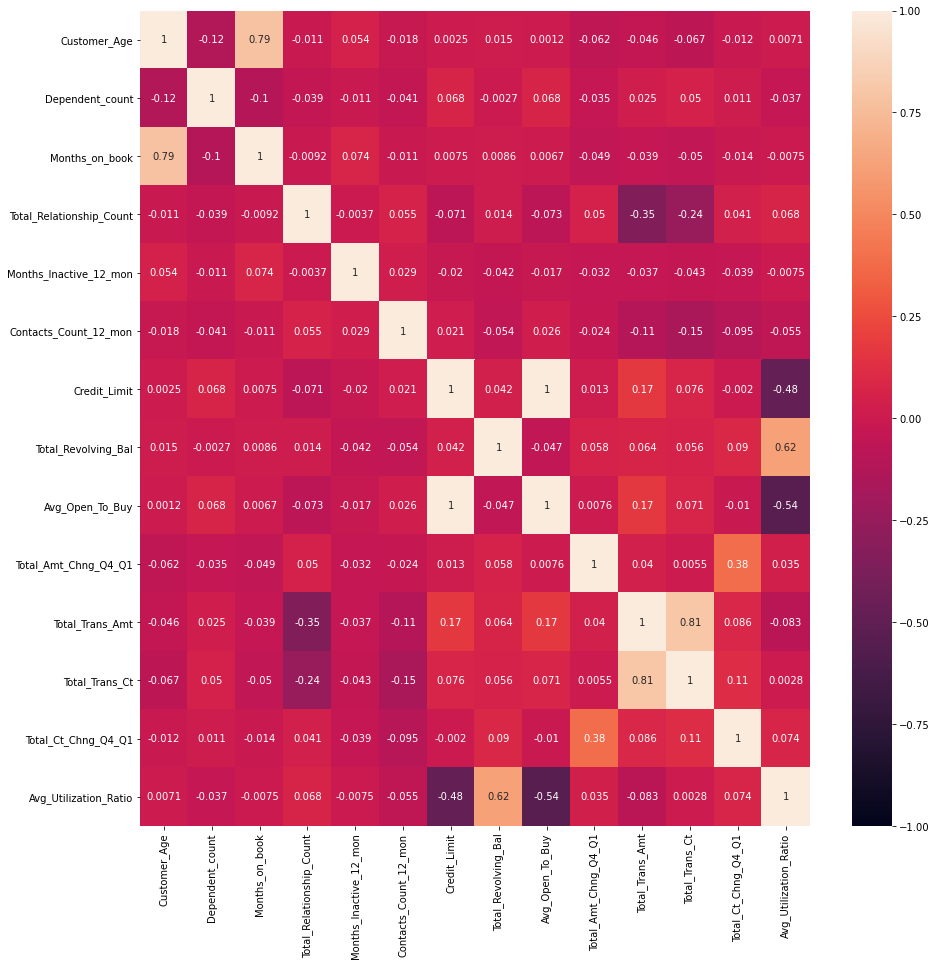

In [10]:
ndata=df.iloc[:,[1,3,8,9,10,11,12,13,14,15,16,17,18,19]]
fig=plt.figure(figsize=(15,15))
sns.heatmap(ndata.corr(),vmin=-1,vmax=1,annot=True)
# corelation balaye months on book va age (0.79)
# correlation balaye Total Revovlving Balance va Average Utilization Ratio(0.62)
#correlation balaye Total Transaction Count va Total Transaction Amount

C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


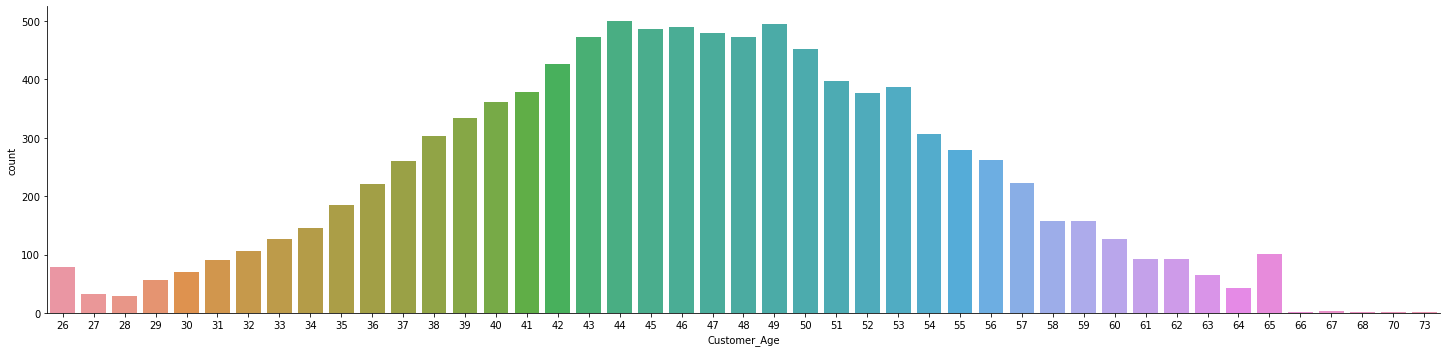

In [11]:
sns.factorplot("Customer_Age", data = df, aspect = 4, kind = "count")

# results from EDA

In [12]:
# dade be shedat imbalance hastand .
# correlation beine credit limit va avg open to buy 1 has pas yeki ro be delkhah hazf mikonim . (delete open average to buy)
# bishtare senha beine 38 ta 54 sal hastan

## handle categorical data

In [13]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [14]:
data1=data.drop(['CLIENTNUM','Avg_Open_To_Buy'],axis=1)
data1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000


In [15]:
data1.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [16]:
data2=data1.replace({'Attrition_Flag':'Existing Customer'},1).replace({'Attrition_Flag':'Attrited Customer'},0)

In [17]:
data2.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [18]:
data3=data2.replace({'Gender':'M'},1).replace({'Gender':'F'},0)

In [19]:
data3.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [20]:
data3.Education_Level.mode()

0    Graduate
dtype: object

In [21]:
data4=data3.replace({'Education_Level':'Unknown'},'Graduate')
data5=data4.replace({'Education_Level':'Uneducated'},0).replace({'Education_Level':'High School'},1).replace({'Education_Level':'College'},2).replace({'Education_Level':'Graduate'},3).replace({'Education_Level':'Post-Graduate'},4).replace({'Education_Level':'Doctorate'},5)
data5

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,1,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,1,49,0,5,3,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,1,51,1,3,3,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,1,40,0,4,1,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,1,40,1,3,0,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,3,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10123,0,41,1,2,3,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511
10124,0,44,0,1,1,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,3,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000


In [22]:
data4.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [23]:
#tedade unknown ha faghat 0.07 dadehas pas hazf mikonim
data6=data5[data5['Marital_Status']!='Unknown'].reset_index().drop('index',axis=1)
data7=pd.get_dummies(data6,columns=['Marital_Status'])
data7

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,45,1,3,1,$60K - $80K,Blue,39,5,1,...,12691.0,777,1.335,1144,42,1.625,0.061,0,1,0
1,1,49,0,5,3,Less than $40K,Blue,44,6,1,...,8256.0,864,1.541,1291,33,3.714,0.105,0,0,1
2,1,51,1,3,3,$80K - $120K,Blue,36,4,1,...,3418.0,0,2.594,1887,20,2.333,0.000,0,1,0
3,1,40,1,3,0,$60K - $80K,Blue,21,5,1,...,4716.0,0,2.175,816,28,2.500,0.000,0,1,0
4,1,44,1,2,3,$40K - $60K,Blue,36,3,1,...,4010.0,1247,1.376,1088,24,0.846,0.311,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,1,56,0,1,3,Less than $40K,Blue,50,4,1,...,3688.0,606,0.570,14596,120,0.791,0.164,0,0,1
9374,1,50,1,2,3,$40K - $60K,Blue,40,3,2,...,4003.0,1851,0.703,15476,117,0.857,0.462,0,0,1
9375,0,41,1,2,3,$40K - $60K,Blue,25,4,2,...,4277.0,2186,0.804,8764,69,0.683,0.511,1,0,0
9376,0,44,0,1,1,Less than $40K,Blue,36,5,3,...,5409.0,0,0.819,10291,60,0.818,0.000,0,1,0


In [24]:
data7.Income_Category.value_counts()

Less than $40K    3311
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
Unknown           1030
$120K +            680
Name: Income_Category, dtype: int64

In [25]:
data7.Income_Category.mode()

0    Less than $40K
dtype: object

In [26]:
data8=data7.replace({'Income_Category':'Unknown'},'Less than $40K')
data9=data8.replace({'Income_Category':'Less than $40K'},1).replace({'Income_Category':'$40K - $60K'},2).replace({'Income_Category':'$60K - $80K'},3).replace({'Income_Category':'$80K - $120K'},4).replace({'Income_Category':'$120K +'},5)

In [27]:
data9.Card_Category.value_counts()

Blue        8753
Silver       503
Gold         104
Platinum      18
Name: Card_Category, dtype: int64

In [28]:
data10=data9.replace({'Card_Category':'Blue'},1).replace({'Card_Category':'Silver'},2).replace({'Card_Category':'Gold'},3).replace({'Card_Category':'Platinum'},4)
data10

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,45,1,3,1,3,1,39,5,1,...,12691.0,777,1.335,1144,42,1.625,0.061,0,1,0
1,1,49,0,5,3,1,1,44,6,1,...,8256.0,864,1.541,1291,33,3.714,0.105,0,0,1
2,1,51,1,3,3,4,1,36,4,1,...,3418.0,0,2.594,1887,20,2.333,0.000,0,1,0
3,1,40,1,3,0,3,1,21,5,1,...,4716.0,0,2.175,816,28,2.500,0.000,0,1,0
4,1,44,1,2,3,2,1,36,3,1,...,4010.0,1247,1.376,1088,24,0.846,0.311,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,1,56,0,1,3,1,1,50,4,1,...,3688.0,606,0.570,14596,120,0.791,0.164,0,0,1
9374,1,50,1,2,3,2,1,40,3,2,...,4003.0,1851,0.703,15476,117,0.857,0.462,0,0,1
9375,0,41,1,2,3,2,1,25,4,2,...,4277.0,2186,0.804,8764,69,0.683,0.511,1,0,0
9376,0,44,0,1,1,1,1,36,5,3,...,5409.0,0,0.819,10291,60,0.818,0.000,0,1,0


# handle missing values

In [29]:
data10.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Marital_Status_Divorced     0
Marital_Status_Married      0
Marital_Status_Single       0
dtype: int64

In [30]:
data10.Customer_Age.min()

26

In [31]:
data10.Customer_Age.max()

73

# handle outlier data

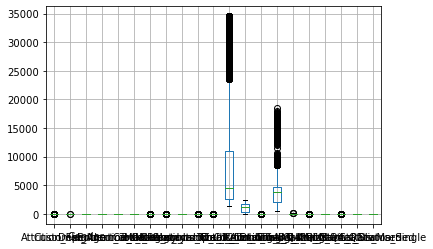

In [32]:
data10.boxplot()

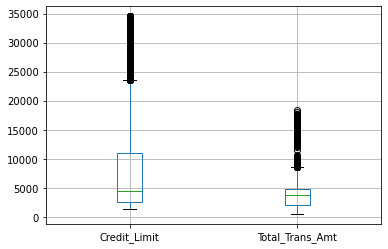

In [33]:
data10.iloc[:,[11,14]].boxplot()

In [34]:
#credit_limit
Q1 = data10.iloc[:,11].quantile(0.25)
Q3 = data10.iloc[:,11].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-10065.0 23557.0


In [35]:
data10[data10["Credit_Limit"] > 23557.0].index

Int64Index([   5,   11,   33,   38,   53,   55,   57,   61,   62,   65,
            ...
            9309, 9322, 9334, 9341, 9343, 9350, 9353, 9357, 9363, 9365],
           dtype='int64', length=909)

In [36]:
#909/9377 = 10%

In [37]:
data11 = data10[data10["Credit_Limit"] <=23557.0 ].reset_index().drop("index", axis = 1)
data11

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,45,1,3,1,3,1,39,5,1,...,12691.0,777,1.335,1144,42,1.625,0.061,0,1,0
1,1,49,0,5,3,1,1,44,6,1,...,8256.0,864,1.541,1291,33,3.714,0.105,0,0,1
2,1,51,1,3,3,4,1,36,4,1,...,3418.0,0,2.594,1887,20,2.333,0.000,0,1,0
3,1,40,1,3,0,3,1,21,5,1,...,4716.0,0,2.175,816,28,2.500,0.000,0,1,0
4,1,44,1,2,3,2,1,36,3,1,...,4010.0,1247,1.376,1088,24,0.846,0.311,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,1,56,0,1,3,1,1,50,4,1,...,3688.0,606,0.570,14596,120,0.791,0.164,0,0,1
8465,1,50,1,2,3,2,1,40,3,2,...,4003.0,1851,0.703,15476,117,0.857,0.462,0,0,1
8466,0,41,1,2,3,2,1,25,4,2,...,4277.0,2186,0.804,8764,69,0.683,0.511,1,0,0
8467,0,44,0,1,1,1,1,36,5,3,...,5409.0,0,0.819,10291,60,0.818,0.000,0,1,0


In [38]:
#Total_Trans_Amt
Q1 = data11.iloc[:,14].quantile(0.25)
Q3 = data11.iloc[:,14].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-1679.5 8500.5


In [39]:
data11[data11["Total_Trans_Amt"] > 8500.5].index

Int64Index([7389, 7395, 7440, 7450, 7477, 7495, 7503, 7535, 7538, 7598,
            ...
            8458, 8459, 8460, 8461, 8463, 8464, 8465, 8466, 8467, 8468],
           dtype='int64', length=666)

In [40]:
#666/8469 = 0.07

In [41]:
data12 = data11[data11["Total_Trans_Amt"] <= 8500.5].reset_index().drop("index", axis = 1)
data12

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,45,1,3,1,3,1,39,5,1,...,12691.0,777,1.335,1144,42,1.625,0.061,0,1,0
1,1,49,0,5,3,1,1,44,6,1,...,8256.0,864,1.541,1291,33,3.714,0.105,0,0,1
2,1,51,1,3,3,4,1,36,4,1,...,3418.0,0,2.594,1887,20,2.333,0.000,0,1,0
3,1,40,1,3,0,3,1,21,5,1,...,4716.0,0,2.175,816,28,2.500,0.000,0,1,0
4,1,44,1,2,3,2,1,36,3,1,...,4010.0,1247,1.376,1088,24,0.846,0.311,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,0,48,1,4,2,4,1,44,2,3,...,9524.0,1449,0.559,7527,58,0.657,0.152,0,1,0
7799,0,33,0,1,5,1,1,15,1,1,...,3709.0,1180,0.645,8130,74,0.897,0.318,0,0,1
7800,0,49,0,4,0,2,1,36,5,2,...,4167.0,0,0.581,7590,87,0.776,0.000,0,1,0
7801,0,52,0,5,3,1,1,36,4,3,...,9611.0,0,0.840,7636,64,0.829,0.000,0,1,0


# handle duplicate data

In [42]:
data12.duplicated().sum()

0

# feature scaling

In [43]:
x=data12.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values
y=data12.iloc[:,0]
binary=data12.iloc[:,[2,18,19,20]].reset_index().drop('index',axis=1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

array([[-0.18127756,  0.52967152, -0.8982767 , ..., -0.9333342 ,
         3.70682081, -0.87649863],
       [ 0.30564457,  2.06725591,  0.59051963, ..., -1.38277303,
        12.15636737, -0.72149232],
       [ 0.54910563,  0.52967152,  0.59051963, ..., -2.03196246,
         6.57052543, -1.09139374],
       ...,
       [ 0.30564457,  1.29846371, -1.64267487, ...,  1.31385997,
         0.27280212, -1.09139374],
       [ 0.67083616,  2.06725591,  0.59051963, ...,  0.16529406,
         0.48717549, -1.09139374],
       [ 1.03602775,  0.52967152, -1.64267487, ..., -0.38402007,
        -0.78693038, -0.48545998]])

In [44]:
df_ss=pd.DataFrame(x_ss,columns=data12.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].columns)
df_ss

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.181278,0.529672,-0.898277,0.805244,-0.141488,0.361091,0.690745,-1.332358,0.480761,1.355348,-0.449608,2.515052,-1.438763,-0.933334,3.706821,-0.876499
1,0.305645,2.067256,0.590520,-0.810420,-0.141488,0.974517,1.362884,-1.332358,-0.415840,0.476426,-0.343069,3.412735,-1.346371,-1.382773,12.156367,-0.721492
2,0.549106,0.529672,0.590520,1.613076,-0.141488,-0.006965,0.018606,-1.332358,-2.209041,-0.482362,-1.401112,8.001373,-0.971776,-2.031962,6.570525,-1.091394
3,-0.789930,0.529672,-1.642675,0.805244,-0.141488,-1.847245,0.690745,-1.332358,-2.209041,-0.225126,-1.401112,6.175505,-1.644916,-1.632461,7.246004,-1.091394
4,-0.303008,-0.239121,0.590520,-0.002588,-0.141488,-0.006965,-0.653533,-1.332358,-0.415840,-0.365040,0.125948,2.693717,-1.473959,-1.832212,0.555937,0.004219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,0.183914,1.298464,-0.153879,1.613076,-0.141488,0.974517,-1.325672,0.639643,0.480761,0.727717,0.373314,-0.866508,2.573051,-0.134332,-0.208527,-0.555917
7799,-1.642044,-1.007913,2.079316,-0.810420,-0.141488,-2.583356,-1.997812,-1.332358,0.480761,-0.424692,0.043901,-0.491748,2.952046,0.664671,0.762221,0.028879
7800,0.305645,1.298464,-1.642675,-0.002588,-0.141488,-0.006965,0.690745,-0.346357,0.480761,-0.333926,-1.401112,-0.770639,2.612648,1.313860,0.272802,-1.091394
7801,0.670836,2.067256,0.590520,-0.810420,-0.141488,-0.006965,0.018606,0.639643,0.480761,0.744958,-1.401112,0.358000,2.641559,0.165294,0.487175,-1.091394


In [45]:
data13=pd.concat([y,binary,df_ss],axis=1)
data13

,Attrition_Flag,Gender,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,0,1,0,-0.181278,0.529672,-0.898277,0.805244,-0.141488,...,0.690745,-1.332358,0.480761,1.355348,-0.449608,2.515052,-1.438763,-0.933334,3.706821,-0.876499
1,1,0,0,0,1,0.305645,2.067256,0.590520,-0.810420,-0.141488,...,1.362884,-1.332358,-0.415840,0.476426,-0.343069,3.412735,-1.346371,-1.382773,12.156367,-0.721492
2,1,1,0,1,0,0.549106,0.529672,0.590520,1.613076,-0.141488,...,0.018606,-1.332358,-2.209041,-0.482362,-1.401112,8.001373,-0.971776,-2.031962,6.570525,-1.091394
3,1,1,0,1,0,-0.789930,0.529672,-1.642675,0.805244,-0.141488,...,0.690745,-1.332358,-2.209041,-0.225126,-1.401112,6.175505,-1.644916,-1.632461,7.246004,-1.091394
4,1,1,0,1,0,-0.303008,-0.239121,0.590520,-0.002588,-0.141488,...,-0.653533,-1.332358,-0.415840,-0.365040,0.125948,2.693717,-1.473959,-1.832212,0.555937,0.004219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,0,1,0,1,0,0.183914,1.298464,-0.153879,1.613076,-0.141488,...,-1.325672,0.639643,0.480761,0.727717,0.373314,-0.866508,2.573051,-0.134332,-0.208527,-0.555917
7799,0,0,0,0,1,-1.642044,-1.007913,2.079316,-0.810420,-0.141488,...,-1.997812,-1.332358,0.480761,-0.424692,0.043901,-0.491748,2.952046,0.664671,0.762221,0.028879
7800,0,0,0,1,0,0.305645,1.298464,-1.642675,-0.002588,-0.141488,...,0.690745,-0.346357,0.480761,-0.333926,-1.401112,-0.770639,2.612648,1.313860,0.272802,-1.091394
7801,0,0,0,1,0,0.670836,2.067256,0.590520,-0.810420,-0.141488,...,0.018606,0.639643,0.480761,0.744958,-1.401112,0.358000,2.641559,0.165294,0.487175,-1.091394


In [46]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_mm=mm.fit_transform(x)

In [47]:
df_mm=pd.DataFrame(x_mm,columns=data12.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].columns)
df_mm

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,0.6,0.2,0.50,0.0,0.604651,0.8,0.166667,0.500000,0.509087,0.308701,0.392994,0.079809,0.310680,0.437534,0.061061
1,0.489362,1.0,0.6,0.00,0.0,0.720930,1.0,0.166667,0.333333,0.308442,0.343266,0.453636,0.098313,0.223301,1.000000,0.105105
2,0.531915,0.6,0.6,0.75,0.0,0.534884,0.6,0.166667,0.000000,0.089564,0.000000,0.763615,0.173338,0.097087,0.628164,0.000000
3,0.297872,0.6,0.0,0.50,0.0,0.186047,0.8,0.166667,0.000000,0.148287,0.000000,0.640271,0.038520,0.174757,0.673129,0.000000
4,0.382979,0.4,0.6,0.25,0.0,0.534884,0.4,0.166667,0.333333,0.116347,0.495431,0.405063,0.072759,0.135922,0.227787,0.311311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,0.468085,0.8,0.4,0.75,0.0,0.720930,0.2,0.500000,0.500000,0.365808,0.575685,0.164557,0.883308,0.466019,0.176898,0.152152
7799,0.148936,0.2,1.0,0.00,0.0,0.046512,0.0,0.166667,0.500000,0.102729,0.468812,0.189873,0.959215,0.621359,0.241519,0.318318
7800,0.489362,0.8,0.0,0.25,0.0,0.534884,0.8,0.333333,0.500000,0.123450,0.000000,0.171033,0.891239,0.747573,0.208939,0.000000
7801,0.553191,1.0,0.6,0.00,0.0,0.534884,0.6,0.500000,0.500000,0.369744,0.000000,0.247277,0.897029,0.524272,0.223209,0.000000


In [48]:
data14=pd.concat([y,binary,df_mm],axis=1)
data14

,Attrition_Flag,Gender,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,0,1,0,0.404255,0.6,0.2,0.50,0.0,...,0.8,0.166667,0.500000,0.509087,0.308701,0.392994,0.079809,0.310680,0.437534,0.061061
1,1,0,0,0,1,0.489362,1.0,0.6,0.00,0.0,...,1.0,0.166667,0.333333,0.308442,0.343266,0.453636,0.098313,0.223301,1.000000,0.105105
2,1,1,0,1,0,0.531915,0.6,0.6,0.75,0.0,...,0.6,0.166667,0.000000,0.089564,0.000000,0.763615,0.173338,0.097087,0.628164,0.000000
3,1,1,0,1,0,0.297872,0.6,0.0,0.50,0.0,...,0.8,0.166667,0.000000,0.148287,0.000000,0.640271,0.038520,0.174757,0.673129,0.000000
4,1,1,0,1,0,0.382979,0.4,0.6,0.25,0.0,...,0.4,0.166667,0.333333,0.116347,0.495431,0.405063,0.072759,0.135922,0.227787,0.311311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,0,1,0,1,0,0.468085,0.8,0.4,0.75,0.0,...,0.2,0.500000,0.500000,0.365808,0.575685,0.164557,0.883308,0.466019,0.176898,0.152152
7799,0,0,0,0,1,0.148936,0.2,1.0,0.00,0.0,...,0.0,0.166667,0.500000,0.102729,0.468812,0.189873,0.959215,0.621359,0.241519,0.318318
7800,0,0,0,1,0,0.489362,0.8,0.0,0.25,0.0,...,0.8,0.333333,0.500000,0.123450,0.000000,0.171033,0.891239,0.747573,0.208939,0.000000
7801,0,0,0,1,0,0.553191,1.0,0.6,0.00,0.0,...,0.6,0.500000,0.500000,0.369744,0.000000,0.247277,0.897029,0.524272,0.223209,0.000000


# feature selection

### brute_force

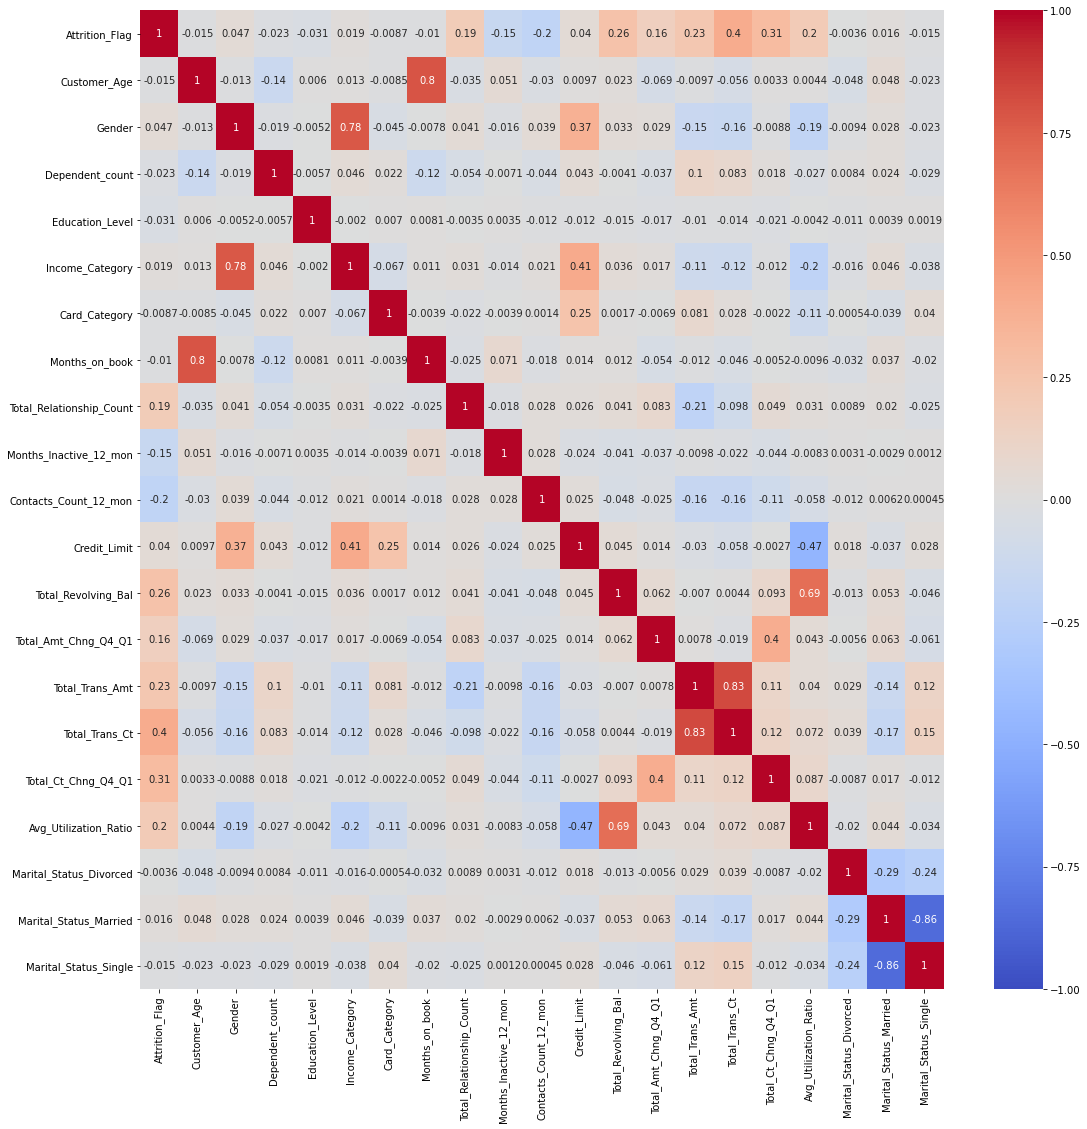

In [49]:
fig=plt.figure(figsize=(18,18))
sns.heatmap(data12.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm')

In [50]:
# raveshe brute force be darde modele ma nemikhorad chon hich featury ba feature hadaf corr bein 60 ta 80 darsad ra nadarad

### filter method

In [51]:
x1 = data14.iloc[:,1:21]
y1 = data14.iloc[:,0]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func = chi2, k = 20)
fit = bestfeatures.fit(x1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)
featurescores = pd.concat([dfcolumns, dfscores], axis = 1)
featurescores.columns = ["feature_name", "feature_score"]
print(featurescores.nlargest(5, "feature_score"))

                feature_name  feature_score
14       Total_Revolving_Bal     124.543683
17            Total_Trans_Ct      95.582112
19     Avg_Utilization_Ratio      82.328155
16           Total_Trans_Amt      46.401545
10  Total_Relationship_Count      43.693864


In [52]:
x1 = data14.iloc[:,1:21]
y1 = data14.iloc[:,0]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(f_classif, k = 17)
fit = bestfeatures.fit(x1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)
featurescores = pd.concat([dfcolumns, dfscores], axis = 1)
featurescores.columns = ["feature_name", "feature_score"]
print(featurescores.nlargest(5, "feature_score"))

             feature_name  feature_score
17         Total_Trans_Ct    1480.258220
18    Total_Ct_Chng_Q4_Q1     840.520764
14    Total_Revolving_Bal     577.528666
16        Total_Trans_Amt     450.094528
19  Avg_Utilization_Ratio     329.493880


In [53]:
# feature Total_Trans_Ct gozine monasebi mibashad

### embedded method

# handle imbalance data

In [54]:
data14.iloc[:,0].value_counts()

1    6523
0    1280
Name: Attrition_Flag, dtype: int64

# Training the Decision Tree Model on the Training set with undersampling

In [112]:
x=data12.iloc[:,1:21]
y=data12.iloc[:,0]

In [113]:
class_count_1 , class_count_0 = data12.iloc[:,0].value_counts()

In [114]:
class_0=data12[data12['Attrition_Flag']==0]
class_1=data12[data12['Attrition_Flag']==1]

In [115]:
class_1_under=class_1.sample(1024)
class_0=class_0.sample(1956,replace=True)

In [116]:
df_under=pd.concat([class_1_under,class_0],axis=0).reset_index().drop('index',axis=1)
df_under

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,35,0,1,0,1,1,36,3,2,...,2004.0,0,0.681,1974,60,0.364,0.000,0,1,0
1,1,39,0,2,2,2,1,29,5,3,...,4938.0,1593,0.700,4516,82,0.783,0.323,0,0,1
2,1,37,1,2,2,4,1,36,3,2,...,12944.0,1399,0.507,4389,84,0.680,0.108,0,0,1
3,1,52,0,2,1,1,1,35,5,2,...,1954.0,808,0.826,4897,70,0.795,0.414,0,0,1
4,1,59,1,2,3,3,1,42,3,2,...,16727.0,1380,0.605,3511,73,0.622,0.083,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0,49,0,3,0,1,1,36,4,2,...,3855.0,211,0.485,1724,34,0.308,0.055,0,0,1
2976,0,41,1,3,3,3,1,32,1,3,...,4697.0,1046,0.313,1679,29,0.318,0.223,0,0,1
2977,0,42,0,2,0,1,2,33,1,2,...,13453.0,2517,0.619,1904,42,0.448,0.187,0,0,1
2978,0,58,0,0,1,1,1,46,5,4,...,1977.0,0,0.868,2341,37,0.370,0.000,0,0,1


### splitting the dataset to train and test data

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

In [118]:
x_train

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
6783,52,1,1,1,4,1,44,1,3,2,3770.0,0,0.544,2387,51,0.500,0.000,0,0,1
6189,59,1,2,3,3,1,36,6,3,2,1438.3,788,0.741,4297,65,0.585,0.548,0,0,1
4319,53,0,3,4,1,1,43,4,3,4,1438.3,0,0.939,4075,71,0.614,0.000,0,1,0
1243,48,1,3,1,2,1,36,3,2,3,7400.0,636,0.972,1568,51,0.500,0.086,0,0,1
4015,38,0,2,1,1,1,27,5,2,1,14831.0,1302,0.916,4467,73,0.698,0.088,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440,48,0,2,3,1,1,42,4,2,0,10514.0,1494,0.649,4949,76,0.810,0.142,0,1,0
6647,45,1,5,5,4,1,35,2,2,2,2226.0,1229,0.784,4928,77,0.638,0.552,0,1,0
7646,45,0,3,1,1,1,40,1,4,2,8383.0,0,1.036,5460,63,0.853,0.000,0,1,0
7631,48,1,2,2,4,1,40,4,3,3,4479.0,0,0.890,4520,63,0.370,0.000,1,0,0


In [119]:
y_train

6783    0
6189    1
4319    1
1243    1
4015    1
       ..
5440    1
6647    1
7646    0
7631    0
998     1
Name: Attrition_Flag, Length: 4681, dtype: int64

In [120]:
x_test

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
7260,50,1,2,4,3,1,36,1,3,2,2296.0,1371,0.604,5483,77,0.791,0.597,0,0,1
528,36,0,2,3,1,1,24,3,1,3,3124.0,1593,0.869,1652,41,0.367,0.510,0,1,0
4763,43,0,4,3,2,1,35,5,2,2,2303.0,722,0.807,4469,80,0.778,0.314,0,0,1
6726,33,0,2,3,1,1,19,3,2,3,5141.0,1737,0.985,5859,82,0.783,0.338,0,0,1
3461,54,0,3,0,2,1,41,3,1,3,2488.0,2196,0.733,4361,75,0.630,0.883,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,57,0,3,2,2,1,44,3,1,2,2817.0,1864,0.700,4535,82,0.745,0.662,0,0,1
678,44,1,3,3,2,1,27,4,2,3,10747.0,1603,0.471,1340,25,0.923,0.149,0,1,0
2247,63,0,2,3,1,1,52,5,2,3,2689.0,2101,0.416,1188,35,0.750,0.781,0,1,0
7474,49,0,4,3,1,1,29,1,3,2,3919.0,2278,0.672,7685,85,0.518,0.581,0,0,1


In [121]:
y_test

7260    1
528     1
4763    1
6726    1
3461    1
       ..
4145    1
678     1
2247    1
7474    1
539     1
Name: Attrition_Flag, Length: 1561, dtype: int64

In [122]:
df_under.iloc[:,0]

0       1
1       1
2       1
3       1
4       1
       ..
2975    0
2976    0
2977    0
2978    0
2979    0
Name: Attrition_Flag, Length: 2980, dtype: int64

##### Validate Criterion and max depth for Decision Tree Algorithm

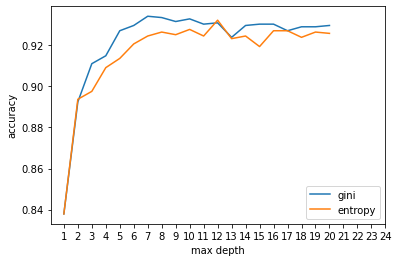

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,21):
  dtree =  DecisionTreeClassifier(criterion =  "gini", max_depth = i)
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_gini.append(accuracy_score(y_test, pred))

  dtree =  DecisionTreeClassifier(criterion =  "entropy", max_depth = i)
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_entropy.append(accuracy_score(y_test, pred))

  max_depth.append(i)


df = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                   "acc_entropy" : pd.Series(acc_entropy), 
                   "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth", "acc_gini", data = df, label = "gini")
plt.plot("max_depth", "acc_entropy", data =df , label = "entropy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks([j for j in range(1,25)])
plt.legend()
plt.show()

### Buliding Model

In [124]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion =  "gini", max_depth = 9)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9)

### Visualization

In [69]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [70]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [71]:
!pip install imblearn

In [72]:
!pip install delayed

In [73]:
conda install nb_conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sun\anaconda3

  added / updated specs:
    - nb_conda


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.3-py38haa244f~ --> pkgs/main::conda-4.10.3-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [74]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [75]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sun\anaconda3

  added / updated specs:
    - imbalanced-learn


Note: you may need to restart the kernel to use updated packages.

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_3


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [76]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


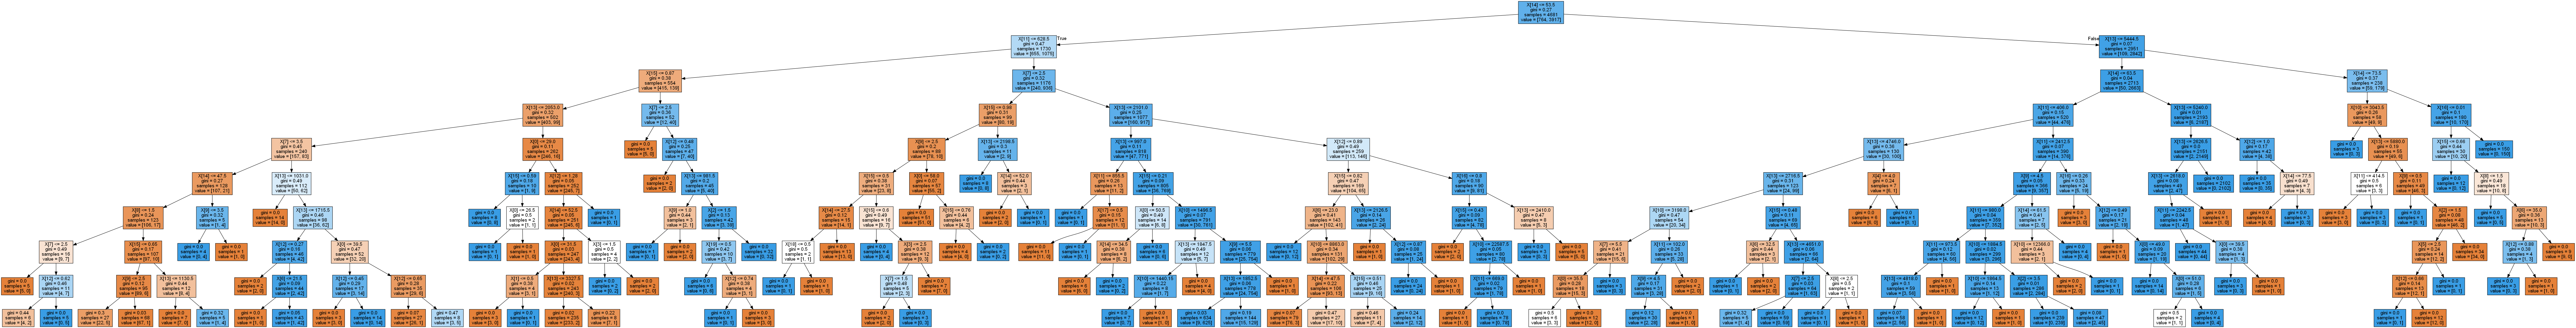

In [77]:
from sklearn.externals.six import StringIO     #show leafs
from sklearn.tree import export_graphviz         #text on leafs and trees
import pydotplus    #building trees
from IPython.display import Image       #show final result

dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, filled = True, precision = 2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Predict the Test set results

In [78]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Validation

### Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 205,   48],
       [  54, 1254]], dtype=int64)

### Accuracy Score

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.934657270980141

### Precision and Recall

#### Precision

In [81]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9631336405529954

#### Recall

In [82]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9587155963302753

### F-Score

In [83]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9609195402298851

### K-Fold Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
estimator = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 30)
estimator.mean()

0.9403955032935924

In [85]:
x_val

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
1521,38,1,2,0,2,1,31,4,3,3,6116.0,1698,0.937,1592,32,1.000,0.278,0,1,0
3395,45,1,3,0,1,1,39,3,3,4,8580.0,1636,0.393,1880,37,0.233,0.191,0,1,0
1899,39,0,2,0,1,1,26,4,2,5,5484.0,2517,0.489,2025,51,0.378,0.459,0,1,0
2539,56,0,2,2,1,1,52,3,5,1,3639.0,2178,0.451,1865,42,0.500,0.599,0,0,1
930,65,1,1,1,2,1,53,3,3,3,3506.0,1604,0.574,1953,61,0.649,0.458,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,32,1,0,1,2,1,28,5,1,2,3172.0,2055,0.663,1939,36,0.636,0.648,0,1,0
4115,55,0,4,1,1,1,36,4,2,3,1477.0,0,0.719,2419,49,0.531,0.000,0,1,0
2419,64,1,0,3,1,1,51,3,3,4,2787.0,1201,0.372,1662,39,0.625,0.431,0,1,0
303,46,1,2,1,5,1,36,5,3,2,19727.0,1785,0.572,1245,25,0.786,0.090,0,1,0


In [86]:
y_val

1521    1
3395    0
1899    1
2539    0
930     1
       ..
932     1
4115    0
2419    1
303     1
2394    1
Name: Attrition_Flag, Length: 1561, dtype: int64

In [87]:
y_pred1=classifier.predict(x_val)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred1)

0.9423446508648302

# Training the Decision Tree Model on the Training set with smote method

In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x2 = data13.iloc[:, 1:21]
y2 = data13.iloc[:,0]
x_smote, y_smote = smote.fit_resample(x2,y2)

print("Original dataset shape", y.shape)
print("Resmaple dataset shape", y_smote.shape)

Original dataset shape (7803,)
Resmaple dataset shape (13046,)


In [90]:
x_smote_df = pd.DataFrame(x_smote, columns = data13.iloc[:, 1:21].columns)
y_smote_df = pd.DataFrame(y_smote)

In [91]:
df_smote = pd.concat([x_smote_df, y_smote_df], axis = 1)
df_smote

,Gender,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,1,0,1,0,-0.181278,0.529672,-0.898277,0.805244,-0.141488,0.361091,...,-1.332358,0.480761,1.355348,-0.449608,2.515052,-1.438763,-0.933334,3.706821,-0.876499,1
1,0,0,0,1,0.305645,2.067256,0.590520,-0.810420,-0.141488,0.974517,...,-1.332358,-0.415840,0.476426,-0.343069,3.412735,-1.346371,-1.382773,12.156367,-0.721492,1
2,1,0,1,0,0.549106,0.529672,0.590520,1.613076,-0.141488,-0.006965,...,-1.332358,-2.209041,-0.482362,-1.401112,8.001373,-0.971776,-2.031962,6.570525,-1.091394,1
3,1,0,1,0,-0.789930,0.529672,-1.642675,0.805244,-0.141488,-1.847245,...,-1.332358,-2.209041,-0.225126,-1.401112,6.175505,-1.644916,-1.632461,7.246004,-1.091394,1
4,1,0,1,0,-0.303008,-0.239121,0.590520,-0.002588,-0.141488,-0.006965,...,-1.332358,-0.415840,-0.365040,0.125948,2.693717,-1.473959,-1.832212,0.555937,0.004219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,0,0,0,0,-1.768844,-1.776705,1.319417,0.771601,-0.141488,-1.374386,...,-0.366889,-0.434510,-0.275174,1.419358,1.054062,3.054317,0.316147,0.214914,0.726638,0
13042,0,0,0,0,1.265909,-0.922150,-1.393549,-0.810420,-0.141488,1.247260,...,0.749637,0.380740,0.552537,-1.401112,-0.045562,2.661929,0.930672,0.789955,-1.091394,0
13043,0,0,1,0,1.978701,-0.850236,-0.898277,-0.810420,-0.141488,1.267086,...,-0.144132,-1.312440,-0.634941,-1.401112,1.371430,-1.630429,-2.172806,-1.031870,-1.091394,0
13044,1,0,0,0,0.892534,0.005261,-1.642675,0.548452,-0.141488,0.528463,...,0.639643,-0.700849,-0.704170,-0.362839,-0.206305,-0.538157,-0.788152,-1.174614,0.172362,0


In [92]:
df_smote.iloc[:,-1].value_counts()

1    6523
0    6523
Name: Attrition_Flag, dtype: int64

In [93]:
x=df_smote.iloc[:,1:21]
y=df_smote.iloc[:,0]

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

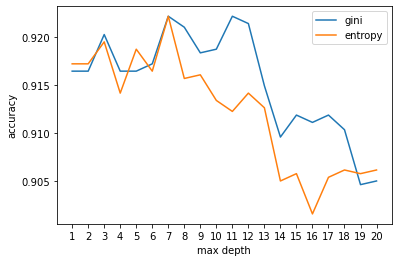

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,21):
  dtree =  DecisionTreeClassifier(criterion =  "gini", max_depth = i)
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_gini.append(accuracy_score(y_test, pred))

  dtree =  DecisionTreeClassifier(criterion =  "entropy", max_depth = i)
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_entropy.append(accuracy_score(y_test, pred))

  max_depth.append(i)


df = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                   "acc_entropy" : pd.Series(acc_entropy), 
                   "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth", "acc_gini", data = df, label = "gini")
plt.plot("max_depth", "acc_entropy", data =df , label = "entropy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks([j for j in range(1,21)])
plt.legend()
plt.show()

In [96]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(criterion='gini',max_depth=7)
classifier2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

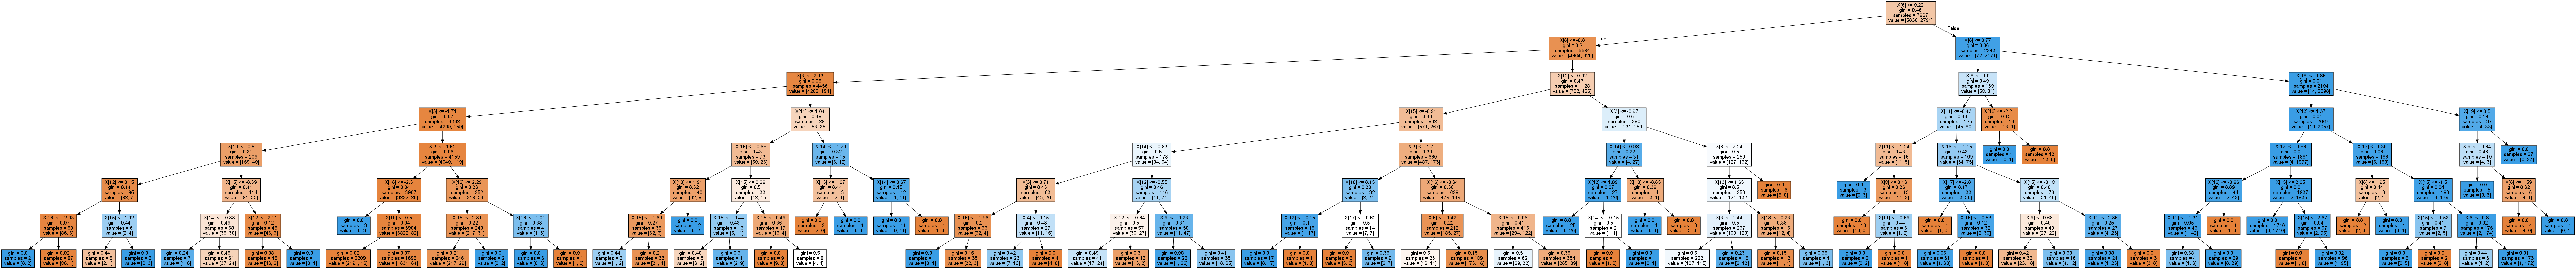

In [97]:
from sklearn.externals.six import StringIO     
from sklearn.tree import export_graphviz         
import pydotplus    
from IPython.display import Image       

dot_data = StringIO()
export_graphviz(classifier2, out_file = dot_data, filled = True, precision = 2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [98]:
y_pred2=classifier2.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[1547,   96],
       [ 107,  860]], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9222222222222223

In [101]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred2)

0.899581589958159

In [102]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred2)

0.889348500517063

In [103]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred2)

0.8944357774310971

In [104]:
from sklearn.model_selection import cross_val_score
estimator = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 30)
estimator.mean()

0.9112088613812752

In [105]:
x_val

,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
3039,0,0,1,0.427375,-0.239121,-0.898277,0.805244,-0.141488,0.483776,0.690745,-0.346357,0.480761,0.760614,-0.035698,-0.940589,0.745957,0.165294,-0.892095,-0.686264,1
4128,0,0,1,-1.398583,0.529672,-1.642675,-0.810420,-0.141488,-0.006965,0.018606,-0.346357,0.480761,-0.639716,0.384336,0.222912,0.662364,0.015481,0.139324,0.867322,1
4563,0,0,1,-0.303008,0.529672,-1.642675,-0.810420,-0.141488,0.238405,0.018606,-1.332358,0.480761,-0.874696,-1.401112,0.188050,0.536661,0.964296,-0.168079,-1.091394,1
626,0,1,0,1.401219,-0.239121,0.590520,-0.002588,-0.141488,1.465258,-1.325672,0.639643,0.480761,-0.350177,1.339514,-0.827289,-1.783189,-2.281651,-0.843557,0.839139,0
6858,0,1,0,0.792567,-0.239121,0.590520,-0.002588,-0.141488,1.097202,-1.325672,-0.346357,-0.415840,-0.243953,-0.283064,0.693541,0.954624,1.064172,0.147414,-0.393865,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,0,1,0,0.183914,2.067256,1.334918,-0.002588,-0.141488,0.238405,-0.653533,0.639643,-1.312440,-0.579866,-0.524308,0.832987,0.493922,0.864421,-0.471437,-0.228290,1
7717,0,0,1,-0.789930,0.529672,0.590520,-0.810420,-0.141488,-0.743077,0.018606,0.639643,-0.415840,-0.501981,-1.401112,-2.160740,0.884230,-0.833459,-1.349155,-1.091394,0
3297,0,1,0,1.401219,0.529672,-0.898277,2.420908,-0.141488,1.710629,1.362884,-0.346357,1.377361,1.356736,1.490138,0.179335,0.623396,0.714608,-0.317736,-0.436140,1
1493,0,1,0,1.401219,-1.007913,-1.642675,-0.810420,-0.141488,-0.006965,0.690745,-0.346357,0.480761,-0.211650,-1.401112,0.641249,-0.800191,-0.334082,0.891654,-1.091394,1


In [106]:
y_val

3039    1
4128    0
4563    0
626     1
6858    0
       ..
6513    0
7717    0
3297    1
1493    0
5595    1
Name: Gender, Length: 2609, dtype: int64

In [107]:
y_pred3=classifier2.predict(x_val)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred3)

0.9214258336527406